In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ISMAIL\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv(r"C:\Users\ISMAIL\OneDrive\Documents\datasets\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#patient = [[60., 1., 0., 150., 300., 1., 1., 168., 1., 1.0, 2., 2., 3.]]

In [5]:
df['target'].unique()

array([0, 1], dtype=int64)

# Exploratory Data Analysis and Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# Visualizations

<AxesSubplot:xlabel='target', ylabel='count'>

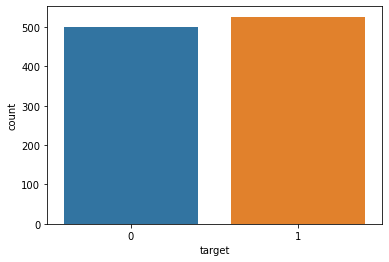

In [9]:
sns.countplot(data=df, x = 'target')

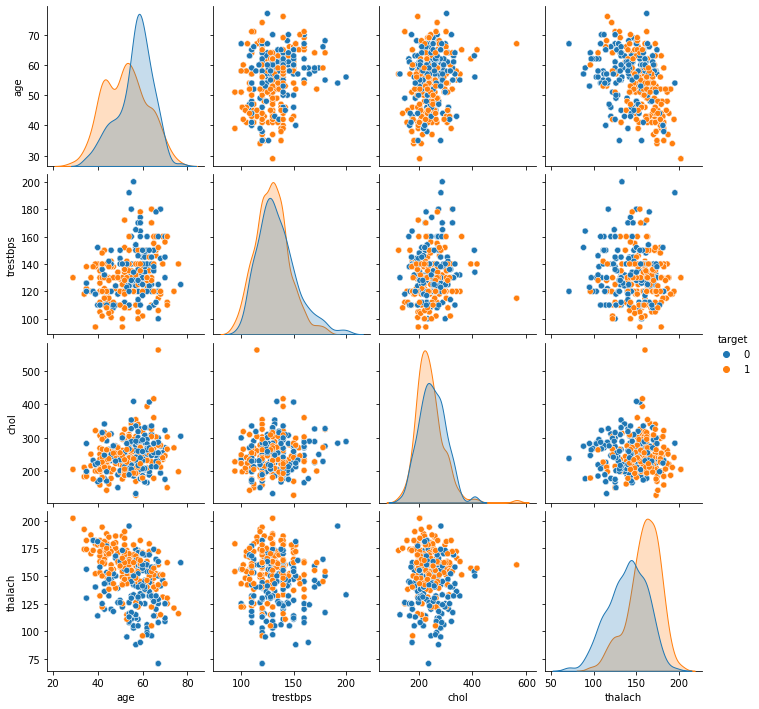

In [10]:
sns.pairplot(df[['age','trestbps','chol','thalach','target']], hue='target')

<AxesSubplot:>

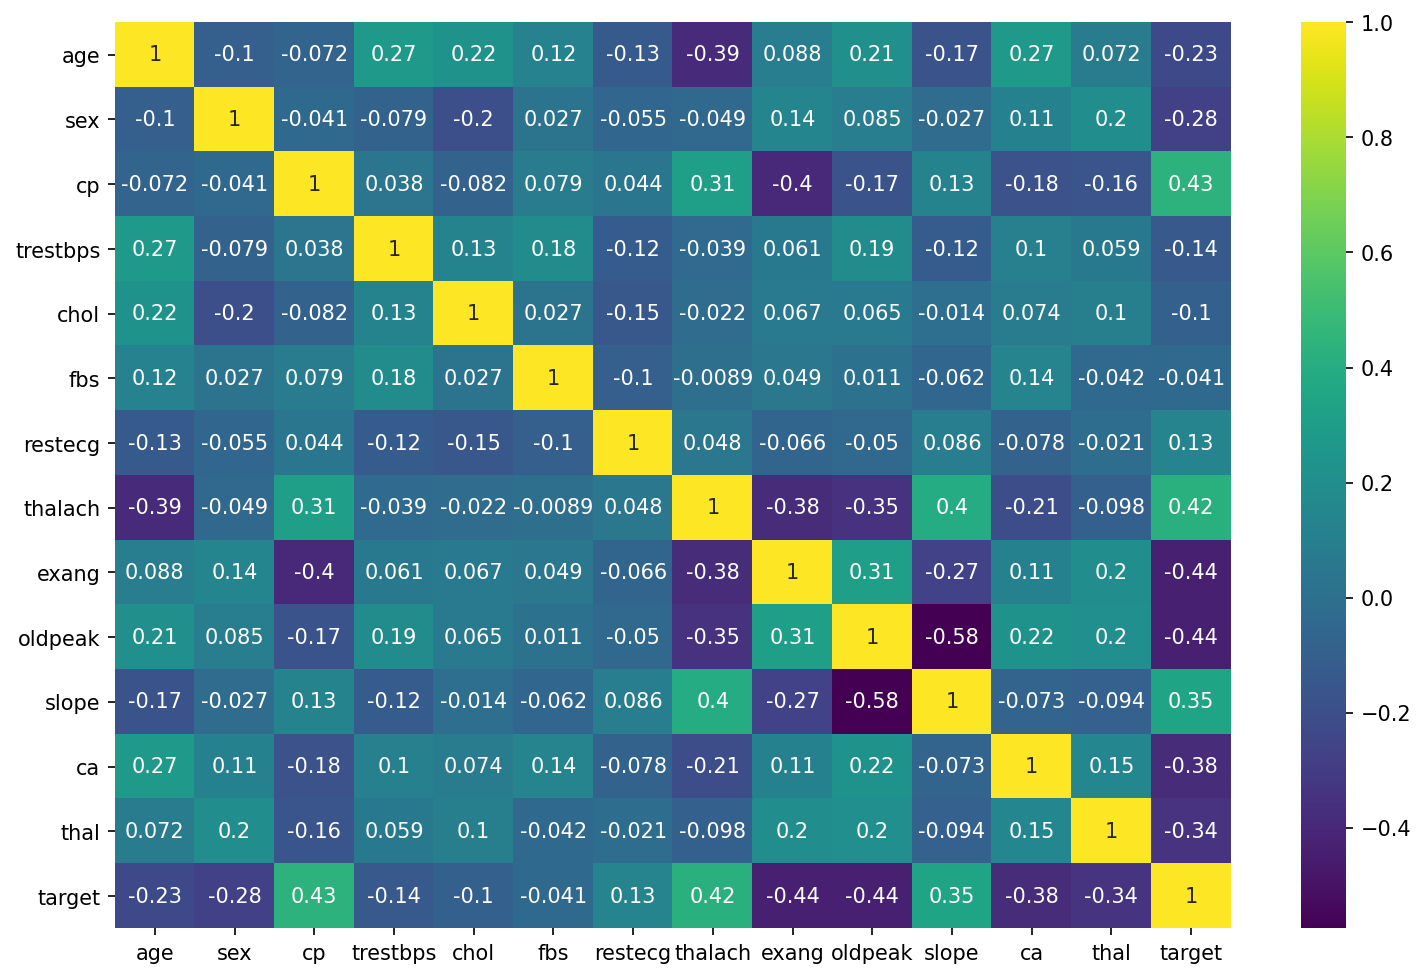

In [11]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(df.corr(), annot=True, cmap='viridis')


# Machine Learning
# Train | Test Split and Scaling

In [12]:
X = df.drop('target', axis=1)
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [15]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistics Regression Model

In [16]:
from sklearn.linear_model import LogisticRegressionCV

In [17]:
#from sklearn.linear_model import LogisticRegressionCV
#help(LogisticRegressionCV)

In [18]:
#assign our LogisticRegressionCV to a variable to make it easier to call
log_model = LogisticRegressionCV()

In [19]:
#Fit our scaled_X_train and y_train data to our logistics regression
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [20]:
#Values of Cs checked
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [21]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [22]:
#Actual value of C decided by the system
log_model.C_

array([0.00599484])

In [23]:
#The parameters it was fitted on
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

# The Coefficients

In [24]:
log_model.coef_[0]

array([-0.1093356 , -0.29001856,  0.36265298, -0.10367586, -0.06603391,
       -0.01985913,  0.09946636,  0.25597633, -0.28538996, -0.29238371,
        0.20479911, -0.32049603, -0.25727105])

# Plotting out the coefficients

In [25]:
coefs = pd.Series(index = X.columns, data=log_model.coef_[0])

In [26]:
coefs

age        -0.109336
sex        -0.290019
cp          0.362653
trestbps   -0.103676
chol       -0.066034
fbs        -0.019859
restecg     0.099466
thalach     0.255976
exang      -0.285390
oldpeak    -0.292384
slope       0.204799
ca         -0.320496
thal       -0.257271
dtype: float64

<AxesSubplot:>

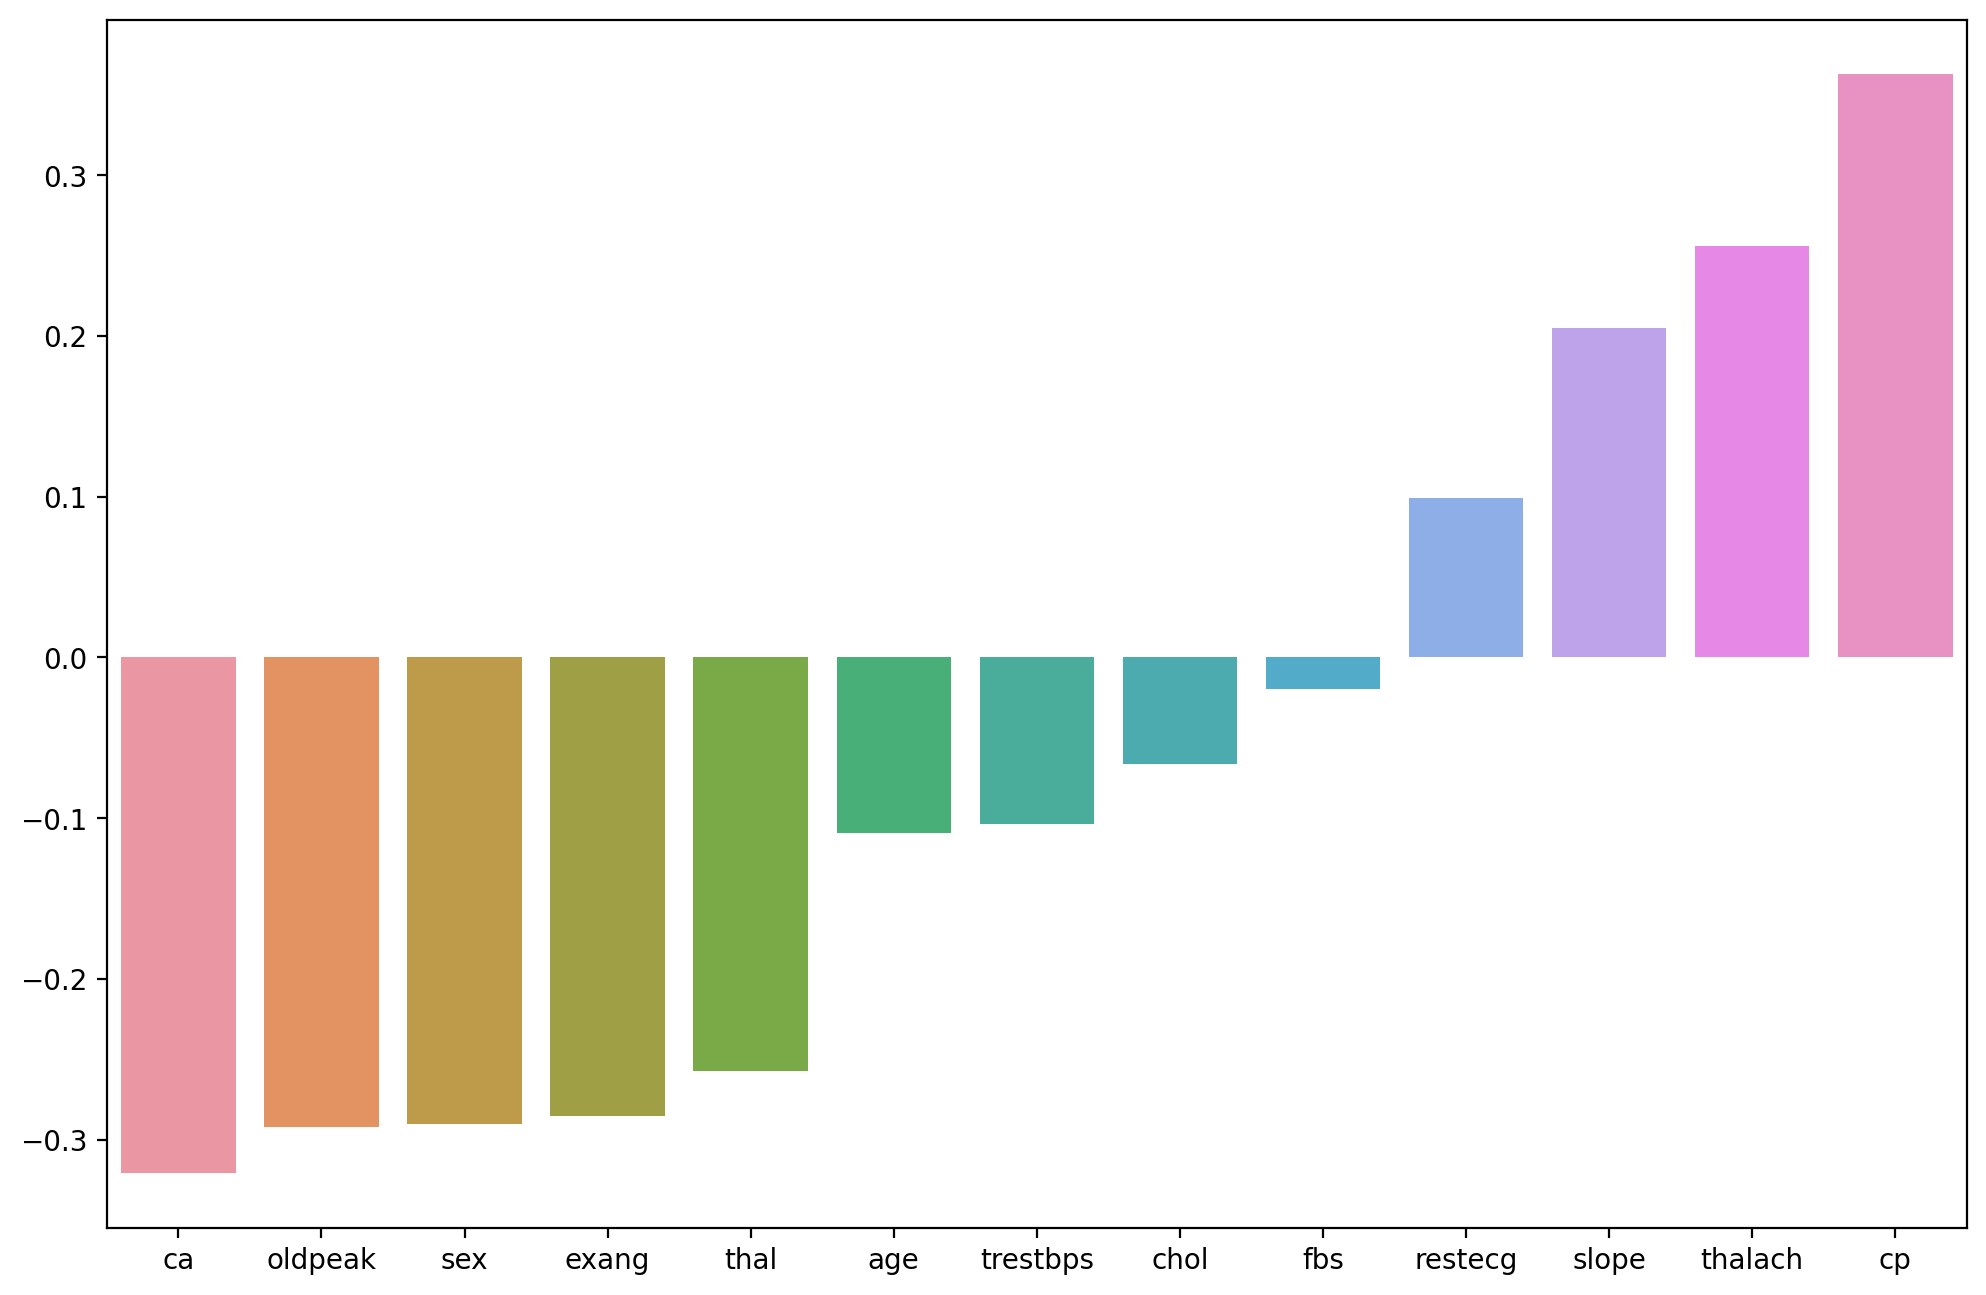

In [27]:
coefs = coefs.sort_values()
plt.figure(figsize=(12,8), dpi=200)

sns.barplot(x=coefs.index, y= coefs.values)

# Model Performance Evaluation

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [29]:
y_pred=log_model.predict(scaled_X_test)

In [30]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [31]:
accuracy_score(y_test,y_pred)

0.8640776699029126

In [32]:
confusion_matrix(y_test,y_pred)

array([[41,  9],
       [ 5, 48]], dtype=int64)

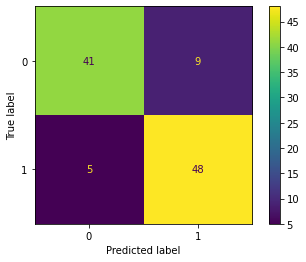

In [33]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.84      0.91      0.87        53

    accuracy                           0.86       103
   macro avg       0.87      0.86      0.86       103
weighted avg       0.87      0.86      0.86       103



# Performance Curves

In [35]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

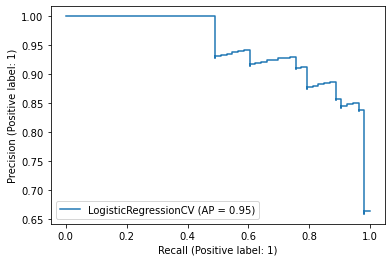

In [36]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

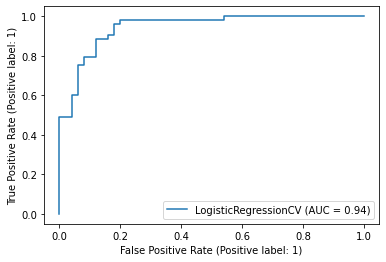

In [37]:
plot_roc_curve(log_model,scaled_X_test,y_test)

# Testing the data with a new patient information

In [38]:
#This is information of a new patient not in the database used to create the model
#Want to use the model to check if the patient has heart disease
#And also the accuracy of the model
patient = [[60., 1., 0., 150., 300., 1., 1., 
            168., 1., 1.0, 2., 2., 3.]]

In [39]:
log_model.predict(patient)

array([0], dtype=int64)

In [40]:
log_model.predict_proba(patient)

array([[0.66503473, 0.33496527]])